In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coughvid-wav/public_dataset/0f0762c8-4b9a-4c1e-a6c3-230f9d53de47.json
/kaggle/input/coughvid-wav/public_dataset/1ed36fa5-19bb-434b-b41f-7fa2b93763f1.json
/kaggle/input/coughvid-wav/public_dataset/48b283df-8bda-4766-b02e-0efee9f7e59c.json
/kaggle/input/coughvid-wav/public_dataset/7444620d-bf48-451b-8e48-7c632d8f5a1c.wav
/kaggle/input/coughvid-wav/public_dataset/4344101d-3fc1-47fd-be0d-c8d4b4caa940.wav
/kaggle/input/coughvid-wav/public_dataset/bb0c6cd9-6465-47ad-be51-7189156d5f2e.wav
/kaggle/input/coughvid-wav/public_dataset/05d6f0ac-ecd7-4aa7-96e1-613d31207fb0.wav
/kaggle/input/coughvid-wav/public_dataset/144b04ae-6c59-4b80-b024-3a16b6407c06.wav
/kaggle/input/coughvid-wav/public_dataset/9e88a91b-9cc6-4376-b7c4-6fa5b3289592.json
/kaggle/input/coughvid-wav/public_dataset/1a152c74-87fe-4da9-be97-0e80b501a68f.wav
/kaggle/input/coughvid-wav/public_dataset/dd212a34-5822-46ac-b683-ed2fbb2e50a6.wav
/kaggle/input/coughvid-wav/public_dataset/88fcba8b-f750-4fad-9aa8-28d6e778cd84.json

In [ ]:
directory = r"../input/coughvid-wav/public_dataset/"

def retrive_data():
    json_files = []
    audio_files = []
    csv_files = []
    file_list = os.listdir(directory)
    json_file = [file for file in file_list if ".json" in str(file)]
    audio_file = [file for file in file_list if ".wav" in str(file)]
    csv_file = [file for file in file_list if ".csv" in str(file)]
    return json_file, audio_file, csv_file
    
json_files, audio_files, csv_files  = retrive_data()

In [ ]:
print("Total files in the directory: ", len([name for name in os.listdir(directory)]))
print("json file count: ", len(json_files))
print("wav file count: ", len(audio_files))
print("csv file count: ", len(csv_files))

Total files in the directory:  55101
json file count:  27550
wav file count:  27550
csv file count:  1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import json
import seaborn as sns
sns.set_palette(sns.color_palette("GnBu_r"))
import matplotlib.pyplot as plt
from IPython import display
import IPython.display as ipd
import sklearn

In [ ]:
ROOT = '../input/coughvid-wav/public_dataset/'

In [ ]:
data_raw = pd.read_csv(ROOT+'metadata_compiled.csv')
data_raw.head()

uuid                          datetime  \
0  00014dcc-0f06-4c27-8c7b-737b18a2cf4c  2020-11-25T18:58:50.488301+00:00   
1  00039425-7f3a-42aa-ac13-834aaa2b6b92  2020-04-13T21:30:59.801831+00:00   
2  0007c6f1-5441-40e6-9aaf-a761d8f2da3b  2020-10-18T15:38:38.205870+00:00   
3  0009eb28-d8be-4dc1-92bb-907e53bc5c7a  2020-04-12T04:02:18.159383+00:00   
4  0012c608-33d0-4ef7-bde3-75a0b1a0024e  2020-04-15T01:03:59.029326+00:00   

   cough_detected        SNR  latitude  longitude   age  gender  \
0          0.0155   7.326171      48.9        2.4   NaN     NaN   
1          0.9609  16.151433      31.3       34.8  15.0    male   
2          0.1643  16.217201       NaN        NaN  46.0  female   
3          0.9301  20.146058      40.0      -75.1  34.0    male   
4          0.0482   0.000000     -16.5      -71.5   NaN     NaN   

  respiratory_condition fever_muscle_pain  ... quality_4 cough_type_4  \
0                   NaN               NaN  ...       NaN          NaN   
1                 False             False  ...       NaN          NaN   
2                 False             False  ...       NaN          NaN   
3                  True             False  ...       NaN          NaN   
4                   NaN               NaN  ...       NaN          NaN   

  dyspnea_4 wheezing_4 stridor_4 choking_4 congestion_4 nothing_4 diagnosis_4  \
0       NaN        NaN       NaN       NaN          NaN       NaN         NaN   
1       NaN        NaN       NaN       NaN          NaN       NaN         NaN   
2       NaN        NaN       NaN       NaN          NaN       NaN         NaN   
3       NaN        NaN       NaN       NaN          NaN       NaN         NaN   
4       NaN        NaN       NaN       NaN          NaN       NaN         NaN   

  severity_4  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 51 columns]

In [ ]:
data_raw.tail()

uuid                          datetime  \
27545  fff30afc-db62-4408-a585-07ca9a254fcc  2020-11-05T08:26:04.219206+00:00   
27546  fff3ff61-2387-4139-938b-539db01e6be5  2020-06-28T21:28:21.530881+00:00   
27547  fff474bf-39a4-4a61-8348-6b992fb5e439  2020-04-10T05:10:36.787070+00:00   
27548  fffaa9f8-4db0-46c5-90fb-93b7b014b55d  2020-04-13T18:58:26.954663+00:00   
27549  fffce9f0-a5e8-4bee-b13b-c671aac4a61c  2020-04-14T13:02:33.307684+00:00   

       cough_detected        SNR  latitude  longitude   age  gender  \
27545          0.9698  11.109221      40.7       29.8   NaN     NaN   
27546          0.5257  43.932829      51.6       -0.2   NaN  female   
27547          0.1945  27.702036     -39.0      -68.1   NaN     NaN   
27548          0.0243   8.825849      41.0       28.8  50.0    male   
27549          0.9754  26.774745      41.0       28.7   NaN     NaN   

      respiratory_condition fever_muscle_pain  ... quality_4 cough_type_4  \
27545                   NaN               NaN  ...       NaN          NaN   
27546                 False             False  ...       NaN          NaN   
27547                   NaN               NaN  ...       NaN          NaN   
27548                  True              True  ...       NaN          NaN   
27549                   NaN               NaN  ...       NaN          NaN   

      dyspnea_4 wheezing_4 stridor_4 choking_4 congestion_4 nothing_4  \
27545       NaN        NaN       NaN       NaN          NaN       NaN   
27546       NaN        NaN       NaN       NaN          NaN       NaN   
27547       NaN        NaN       NaN       NaN          NaN       NaN   
27548       NaN        NaN       NaN       NaN          NaN       NaN   
27549       NaN        NaN       NaN       NaN          NaN       NaN   

      diagnosis_4 severity_4  
27545         NaN        NaN  
27546         NaN        NaN  
27547         NaN        NaN  
27548         NaN        NaN  
27549         NaN        NaN  

[5 rows x 51 columns]

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27550 entries, 0 to 27549
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   27550 non-null  object 
 1   datetime               27550 non-null  object 
 2   cough_detected         27550 non-null  float64
 3   SNR                    27550 non-null  float64
 4   latitude               16084 non-null  float64
 5   longitude              16084 non-null  float64
 6   age                    15218 non-null  float64
 7   gender                 16224 non-null  object 
 8   respiratory_condition  16224 non-null  object 
 9   fever_muscle_pain      16224 non-null  object 
 10  status                 16224 non-null  object 
 11  quality_1              820 non-null    object 
 12  cough_type_1           802 non-null    object 
 13  dyspnea_1              820 non-null    object 
 14  wheezing_1             820 non-null    object 
 15  st

In [ ]:
data_raw.columns

Index(['uuid', 'datetime', 'cough_detected', 'SNR', 'latitude', 'longitude',
       'age', 'gender', 'respiratory_condition', 'fever_muscle_pain', 'status',
       'quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1',
       'choking_1', 'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1',
       'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2',
       'choking_2', 'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2',
       'quality_3', 'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3',
       'choking_3', 'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3',
       'quality_4', 'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4',
       'choking_4', 'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

In [ ]:
data_raw['datetime'] = pd.to_datetime(data_raw.datetime)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27550 entries, 0 to 27549
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   uuid                   27550 non-null  object             
 1   datetime               27550 non-null  datetime64[ns, UTC]
 2   cough_detected         27550 non-null  float64            
 3   SNR                    27550 non-null  float64            
 4   latitude               16084 non-null  float64            
 5   longitude              16084 non-null  float64            
 6   age                    15218 non-null  float64            
 7   gender                 16224 non-null  object             
 8   respiratory_condition  16224 non-null  object             
 9   fever_muscle_pain      16224 non-null  object             
 10  status                 16224 non-null  object             
 11  quality_1              820 non-null    object         

In [ ]:
data = data_raw[data_raw.cough_detected >= 0.8] 
data.isnull().sum()

uuid                         0
datetime                     0
cough_detected               0
SNR                          0
latitude                  5999
longitude                 5999
age                       4834
gender                    4306
respiratory_condition     4306
fever_muscle_pain         4306
status                    4306
quality_1                14323
cough_type_1             14323
dyspnea_1                14323
wheezing_1               14323
stridor_1                14323
choking_1                14323
congestion_1             14323
nothing_1                14323
diagnosis_1              14323
severity_1               14323
quality_2                14323
cough_type_2             14324
dyspnea_2                14323
wheezing_2               14323
stridor_2                14323
choking_2                14323
congestion_2             14323
nothing_2                14323
diagnosis_2              14323
severity_2               14323
quality_3                14329
cough_ty

In [ ]:
x , sr = librosa.load(directory + audio_files[0])
ipd.Audio(directory + audio_files[0])

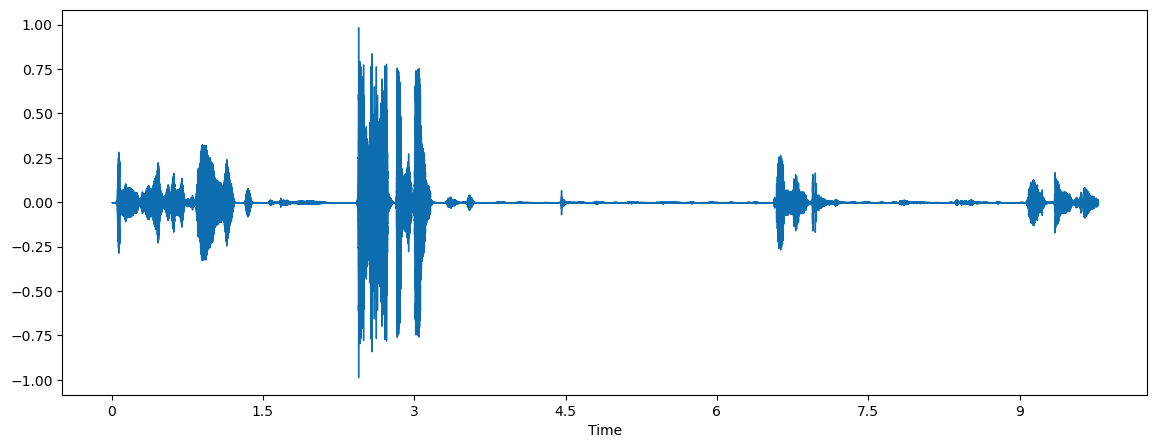

In [ ]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

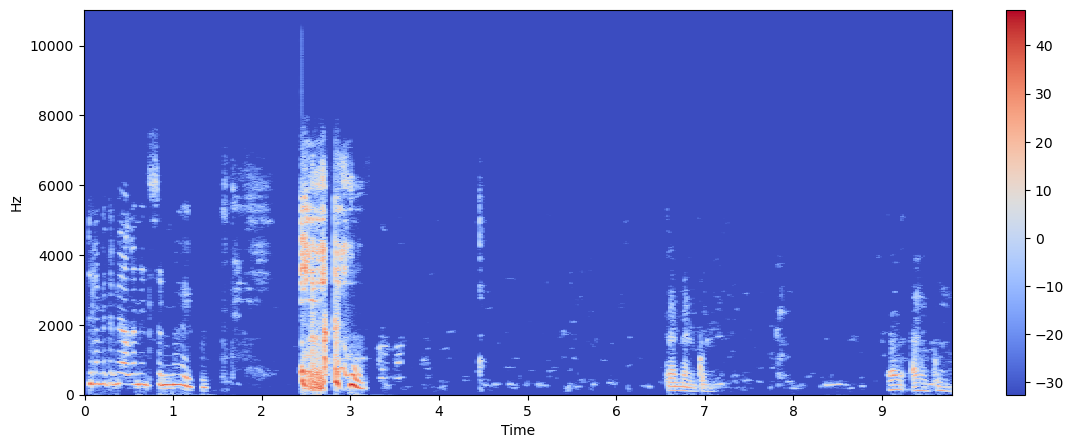

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

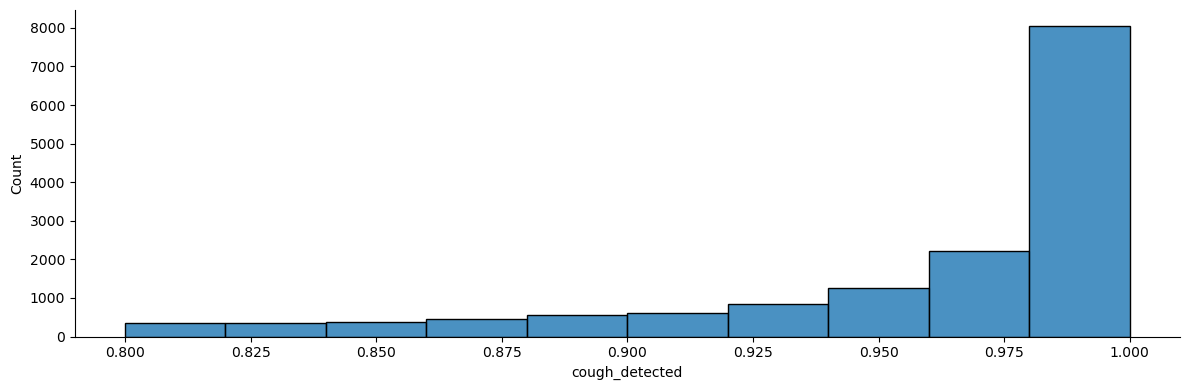

In [ ]:
sns.displot(data, x="cough_detected", bins=10, height=4, aspect=3)

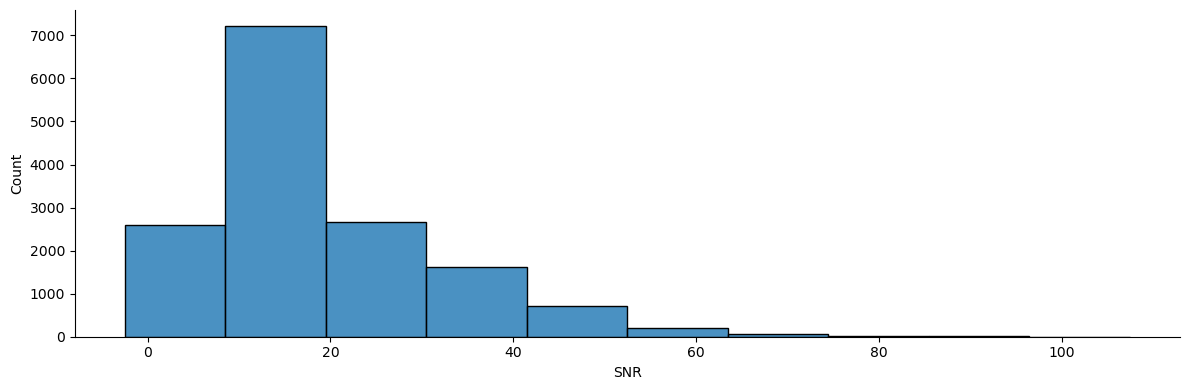

In [ ]:
sns.displot(data, x="SNR", bins=10, height=4, aspect=3)

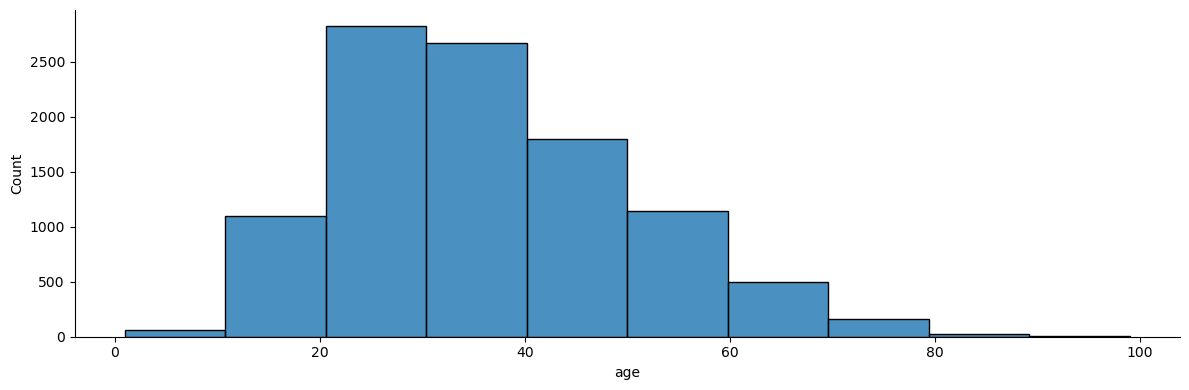

In [ ]:
sns.displot(data, x="age", bins=10, height=4, aspect=3)

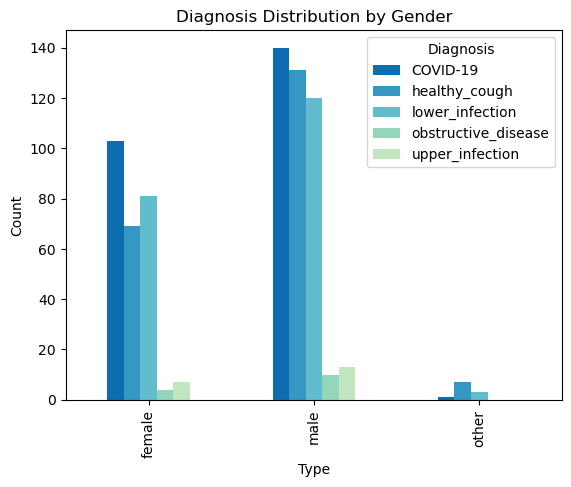

In [ ]:
crosstab = pd.crosstab(data['gender'], data['diagnosis_1'])
crosstab.plot(kind='bar', stacked=False)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Diagnosis Distribution by Gender')
plt.legend(title='Diagnosis')

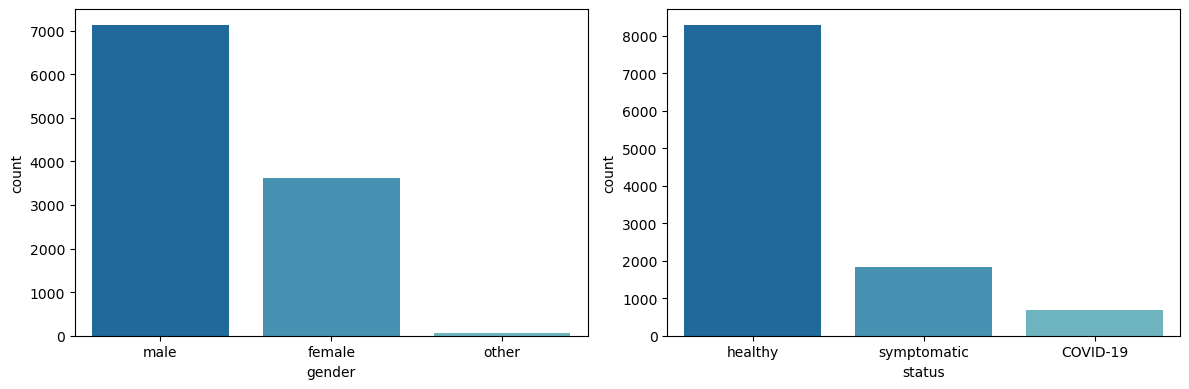

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=data, x="gender", ax=axs[0])
sns.countplot(data=data, x="status", ax=axs[1])
f.tight_layout()

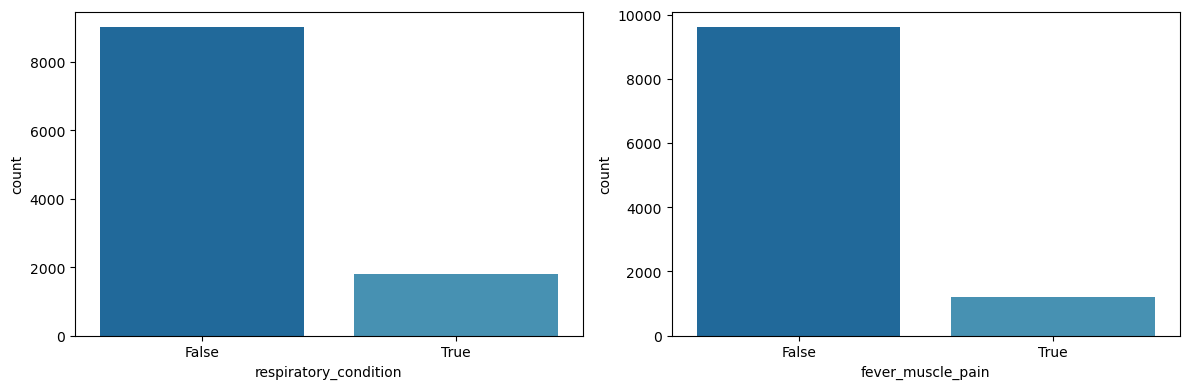

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=data, x="respiratory_condition", ax=axs[0])
sns.countplot(data=data, x="fever_muscle_pain", ax=axs[1])
f.tight_layout()